In [1]:
#all packages which will be used
import numpy as np
import pandas as pd
from scipy.io import loadmat
import time
import random

#plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
from matplotlib.axes import Axes

#sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
#to plot more than 2 dimensions 
#from mlxtend.plotting import plot_decision_regions

#scipy
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.spatial import distance


#math
from math import log

In [2]:
dataset = loadmat ("D:\\lab; signal processing\\forStudents\\medData\\dataset.mat",mat_dtype=True)

In [47]:
data = dataset ["dataset"]
type(data)

numpy.ndarray

In [48]:
data[9][0][0][0][0].shape

(99, 83, 80, 5)

In [49]:
for i in range (len(data)):
    print(data[i][0][0][0][0][:,:,:,0].shape)

(34, 41, 31)
(80, 82, 82)
(82, 74, 80)
(89, 102, 85)
(66, 78, 62)
(69, 83, 66)
(50, 57, 48)
(55, 69, 54)
(64, 65, 63)
(99, 83, 80)
(107, 99, 85)
(320, 320, 39)
(320, 320, 43)
(320, 320, 39)


In [50]:
sum = 0
for i in range (len(data)):
    sum = sum + data[i][0][0][0][0].size
sum    

85436685

In [48]:
def plot_image(data,stuck,slices,features,alphapara,cmap):
    target_data=data[stuck][0][0][0][0][:,:,slices,features]
    target_image=target_data.reshape(target_data.shape[0],target_data.shape[1])
    plt.imshow(target_image,cmap,alpha=alphapara)
    plt.axis("off") #close the axis number

In [49]:
def plot_setimage(stuck,slices):
    features = 0
    plt.figure(figsize=(8,4))
    alphapara = 1;
    cmap = matplotlib.cm.binary
    plt.subplot(151)
    plt.title("T2 weighted")
    plot_image(data,stuck,slices,features,alphapara,cmap)
    plt.show()

    plt.subplot(152)
    plt.title("ADC")
    plot_image(data,stuck,slices,features+1,alphapara,cmap)
    plt.show()

    plt.subplot(153)
    plt.title("Ktrans")
    plot_image(data,stuck,slices,features+2,alphapara,cmap)
    plt.show()

    plt.subplot(154)
    plt.title("Kep")
    plot_image(data,stuck,slices,features+3,alphapara,cmap)
    plt.show()

    plt.subplot(155)
    plt.title("PET")
    plot_image(data,stuck,slices,features+4,alphapara,cmap)
    plt.show()

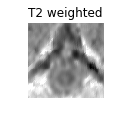

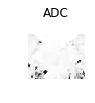

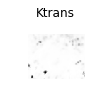

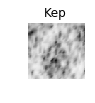

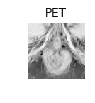

In [50]:
stuck,slices= 1, 12
plot_setimage(stuck,slices)


In [51]:
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list('my_cmap',['black','green','blue'],256)
def plot_all(data,stuck,index,slices,features):
    target_data=data[stuck][0][0][0][0][:,:,slices,features]
    target_image1=target_data.reshape(target_data.shape[0],target_data.shape[1])
    target_label=data[stuck][0][0][0][index][:,:,slices]
    target_image2=target_label.reshape(target_label.shape[0],target_label.shape[1])
    plt.imshow(target_image1,cmap = matplotlib.cm.binary,alpha=0.8)
    plt.imshow(target_image2,cmap = cmap1,interpolation="bilinear",alpha=0.2)
    plt.axis("off") #close the axis number

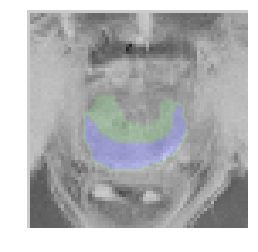

In [56]:
stuck,slices,index,features=8,24,1,4
#plot_image(data,stuck,slices,0)
#plot_label(data,stuck,2,slices)
plot_all(data,stuck,index,slices,features)
plt.show()

In [56]:
'''
experts_num,histo_num=11,3
label_final=[]       #list
for i in range(experts_num):
    labelA=data[i][0][0][0][1]
    labelB=data[i][0][0][0][2]
    for index,(item_A,item_B) in enumerate(zip(labelA.flat,labelB.flat)):
                if item_A == item_B:
                    pass
                else:
                    labelA.flat[index]=0
    label_final.append(labelA)
'''    

'\nexperts_num,histo_num=11,3\nlabel_final=[]       #list\nfor i in range(experts_num):\n    labelA=data[i][0][0][0][1]\n    labelB=data[i][0][0][0][2]\n    for index,(item_A,item_B) in enumerate(zip(labelA.flat,labelB.flat)):\n                if item_A == item_B:\n                    pass\n                else:\n                    labelA.flat[index]=0\n    label_final.append(labelA)\n'

In [57]:
'''
experts_num,histo_num=11,3
label_final=[]       #list
for i in range(experts_num):
    labelA=data[i][0][0][0][1]
    labelB=data[i][0][0][0][2]
    for index,(item_A,item_B) in enumerate(zip(labelA.flat,labelB.flat)):
                if item_A == item_B:
                    pass
                elif ((item_A == 1)&(item_B == 2)):
                    pass
                elif ((item_A ==2)&(item_B == 1)):
                    labelA.flat[index]=1
                else:
                    labelA.flat[index]=0
    label_final.append(labelA)
print(len(label_final))
'''

'\nexperts_num,histo_num=11,3\nlabel_final=[]       #list\nfor i in range(experts_num):\n    labelA=data[i][0][0][0][1]\n    labelB=data[i][0][0][0][2]\n    for index,(item_A,item_B) in enumerate(zip(labelA.flat,labelB.flat)):\n                if item_A == item_B:\n                    pass\n                elif ((item_A == 1)&(item_B == 2)):\n                    pass\n                elif ((item_A ==2)&(item_B == 1)):\n                    labelA.flat[index]=1\n                else:\n                    labelA.flat[index]=0\n    label_final.append(labelA)\nprint(len(label_final))\n'

In [58]:
experts_num,histo_num=11,3
train_index_matrix = []
train_isolated_feature0=[]
train_isolated_feature1=[]
train_isolated_feature2=[]
train_isolated_feature3=[]
train_isolated_feature4=[]
train_isolated_label=[]
train_sourceofpixels = []
for i in range(experts_num):
    feature0 = data [i][0][0][0][0][:,:,:,0]
    feature1 = data [i][0][0][0][0][:,:,:,1]
    feature2 = data [i][0][0][0][0][:,:,:,2]
    feature3 = data [i][0][0][0][0][:,:,:,3]
    feature4 = data [i][0][0][0][0][:,:,:,4]
    tempA = data[i][0][0][0][1]
    tempB = data[i][0][0][0][2]
    ita = np.nditer(tempA, flags =['multi_index'])
    itb = np.nditer(tempB, flags =['multi_index'])
    itf0 = np.nditer(feature0,flags =['multi_index'])
    itf1 = np.nditer(feature1,flags =['multi_index'])
    itf2 = np.nditer(feature2,flags =['multi_index'])
    itf3 = np.nditer(feature3,flags =['multi_index'])
    itf4 = np.nditer(feature4,flags =['multi_index'])
    while not ita.finished:
        if ((ita[0]==1)&(itb[0]==1)):
            train_isolated_feature0.append(itf0[0])
            train_isolated_feature1.append(itf1[0])
            train_isolated_feature2.append(itf2[0])
            train_isolated_feature3.append(itf3[0])
            train_isolated_feature4.append(itf4[0])
            train_isolated_label.append(ita[0])
            train_index_matrix.append(np.array(ita.multi_index))
            train_sourceofpixels.append(i)
        elif ((ita[0]==2)&(itb[0]==2)):
            train_isolated_feature0.append(itf0[0])
            train_isolated_feature1.append(itf1[0])
            train_isolated_feature2.append(itf2[0])
            train_isolated_feature3.append(itf3[0])
            train_isolated_feature4.append(itf4[0])
            train_isolated_label.append(ita[0])
            train_index_matrix.append(np.array(ita.multi_index))
            train_sourceofpixels.append(i)
        elif((ita[0] == 1)&(itb[0]== 2)):
            train_isolated_feature0.append(itf0[0])
            train_isolated_feature1.append(itf1[0])
            train_isolated_feature2.append(itf2[0])
            train_isolated_feature3.append(itf3[0])
            train_isolated_feature4.append(itf4[0])
            train_isolated_label.append(ita[0])
            train_index_matrix.append(np.array(ita.multi_index))
            train_sourceofpixels.append(i)
        elif((ita[0] ==2) & (itb[0]==1)):
            train_isolated_feature0.append(itf0[0])
            train_isolated_feature1.append(itf1[0])
            train_isolated_feature2.append(itf2[0])
            train_isolated_feature3.append(itf3[0])
            train_isolated_feature4.append(itf4[0])
            train_isolated_label.append(itb[0])
            train_index_matrix.append(np.array(ita.multi_index))
            train_sourceofpixels.append(i)
        else:
            pass
        itf0.iternext()
        itf1.iternext()
        itf2.iternext()
        itf3.iternext()
        itf4.iternext()
        itb.iternext()
        ita.iternext()

In [61]:
tempdic_train = {'label':train_isolated_label, 'sourceofpixel':train_sourceofpixels, 'indexofpixel':train_index_matrix,'feature0':train_isolated_feature0,'feature1':train_isolated_feature1,'feature2':train_isolated_feature2,'feature3':train_isolated_feature3,'feature4':train_isolated_feature4}
train_data= pd.DataFrame(data=tempdic_train)

In [107]:
train_data.iloc[1]['indexofpixel'][2]

0

In [64]:
tempdic_train = {'feature0':train_isolated_feature0,'feature1':train_isolated_feature1,'feature2':train_isolated_feature2,'feature3':train_isolated_feature3,'feature4':train_isolated_feature4}
train_feature= pd.DataFrame(data=tempdic_train)

In [65]:
tempdic_train = {'label':train_isolated_label, 'sourceofpixel':train_sourceofpixels, 'indexofpixel':train_index_matrix}
train_label= pd.DataFrame(data=tempdic_train)

In [66]:
validation_index_matrix = []
validation_isolated_feature0=[]
validation_isolated_feature1=[]
validation_isolated_feature2=[]
validation_isolated_feature3=[]
validation_isolated_feature4=[]
validation_isolated_label=[]
validation_sourceofpixel = []
for i in range(histo_num):
    temp_label = data[i+11][0][0][0][3]
    temp_feature0 = data[i+11][0][0][0][0][:,:,:,0]
    temp_feature1 = data[i+11][0][0][0][0][:,:,:,1]
    temp_feature2 = data[i+11][0][0][0][0][:,:,:,2]
    temp_feature3 = data[i+11][0][0][0][0][:,:,:,3]
    temp_feature4 = data[i+11][0][0][0][0][:,:,:,4]
    it_label = np.nditer(temp_label, flags=['multi_index'])
    it_feature0 = np.nditer(temp_feature0, flags=['multi_index'])
    it_feature1 = np.nditer(temp_feature1, flags=['multi_index'])
    it_feature2 = np.nditer(temp_feature2, flags=['multi_index'])
    it_feature3 = np.nditer(temp_feature3, flags=['multi_index'])
    it_feature4 = np.nditer(temp_feature4, flags=['multi_index'])
    while not it_label.finished:
        if (it_label[0] != 0 ):
            validation_isolated_feature0.append(it_feature0[0])
            validation_isolated_feature1.append(it_feature1[0])
            validation_isolated_feature2.append(it_feature2[0])
            validation_isolated_feature3.append(it_feature3[0])
            validation_isolated_feature4.append(it_feature4[0])
            validation_isolated_label.append(it_label[0])
            validation_index_matrix.append(np.array(it_label.multi_index))
            validation_sourceofpixel.append(i+11)
        else:
            pass
        it_feature0.iternext()
        it_feature1.iternext()
        it_feature2.iternext()
        it_feature3.iternext()
        it_feature4.iternext()
        it_label.iternext()    

In [108]:
tempdic_validation = {'label':validation_isolated_label , 'sourceofpixel':validation_sourceofpixel, 'indexofpixel':validation_index_matrix,'feature0':validation_isolated_feature0,'feature1':validation_isolated_feature1,'feature2':validation_isolated_feature2,'feature3':validation_isolated_feature3,'feature4':validation_isolated_feature4}
validation_data = pd.DataFrame(data=tempdic_validation)

In [109]:
tempdic_validation = {'label':validation_isolated_label , 'sourceofpixel':validation_sourceofpixel, 'indexofpixel':validation_index_matrix}
validation_label = pd.DataFrame(data=tempdic_validation)

In [110]:
tempdic_validation = {'feature0':validation_isolated_feature0,'feature1':validation_isolated_feature1,'feature2':validation_isolated_feature2,'feature3':validation_isolated_feature3,'feature4':validation_isolated_feature4}
validation_feature=pd.DataFrame(data=tempdic_validation)

In [111]:
train_feature.to_csv("D:\\lab; signal processing\\forStudents\\medData\\train_feature.csv",index=True)
train_label.to_csv("D:\\lab; signal processing\\forStudents\\medData\\train_label.csv",index=True)
validation_feature.to_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_feature.csv",index=True)
validation_label.to_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_label.csv",index=True)

In [2]:
X_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_feature.csv")
y_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_label.csv")
X_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_feature.csv")
y_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_label.csv")

In [3]:
np.array([X_train['feature0']]).shape

(1, 382778)

In [4]:
scaler1=MinMaxScaler(feature_range=(0, 1), copy=True)
class Feature_scaling(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        scaler1.fit(np.array(X['feature0']).reshape(-1,1))
        return self
    def transform(self,X,y=None):
        X['feature0']=scaler1.transform(np.array(X['feature0']).reshape(-1,1))
        return X

In [5]:
scaler2=StandardScaler()
class Normalization(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        scaler2.fit(X[['feature1','feature2','feature3','feature4']])
        return self
    def transform(self,X,y=None):
        X[['feature1','feature2','feature3','feature4']]=scaler2.transform(X[['feature1','feature2','feature3','feature4']])
        return pd.DataFrame(X)

In [6]:
feature_eng=Pipeline([("feature_scale",Feature_scaling()),
                     ("normalization",Normalization())])

In [10]:
feature_eng.fit_transform(X_train.drop('Unnamed: 0',1))

feature0  feature1  feature2  feature3  feature4
0       0.557963  0.255994 -0.305704 -0.676082 -1.628391
1       0.526320  0.254334 -0.309944 -0.631490 -1.494394
2       0.529836  0.192340 -0.312408 -0.581774 -1.633720
3       0.529867  0.103581 -0.311869 -0.570006 -1.454808
4       0.545996  0.052847 -0.312142 -0.588347 -1.707614
5       0.541738 -0.006101 -0.316204 -0.637027 -1.637711
6       0.549538 -0.088238 -0.319034 -0.683939 -1.817469
7       0.556883 -0.155558 -0.319454 -0.659210 -1.729605
8       0.682539  0.317403 -0.302943 -0.872620 -0.332588
9       0.660407  0.215041 -0.312219 -0.881707 -0.616229
10      0.627345  0.140478 -0.315034 -0.907601 -0.869911
11      0.593671  0.044791 -0.320227 -0.913330 -1.451370
12      0.559372 -0.100949 -0.329204 -0.863614 -1.599572
13      0.532778 -0.198020 -0.330443 -0.813898 -1.554327
14      0.519742 -0.229389 -0.324314 -0.822273 -1.192123
15      0.497474 -0.237085 -0.321350 -0.870953 -1.684188
16      0.502026 -0.284178 -0.325053 -0.918005 -1.801614
17      0.506485 -0.338386 -0.325573 -0.908052 -1.947735
18      0.517203 -0.376110 -0.322763 -0.915302 -1.797969
19      0.531328 -0.408909 -0.322174 -0.922056 -1.758877
20      0.535092 -0.447857 -0.324992 -0.928068 -1.659756
21      0.557842 -0.474844 -0.326731 -0.925997 -1.354935
22      0.559511 -0.486713 -0.329340 -0.937896 -1.625188
23      0.725600  0.428397 -0.270756 -0.935821 -0.429422
24      0.710279  0.243957 -0.298523 -0.963243  0.198990
25      0.682631  0.056278 -0.318438 -0.989136 -0.182395
26      0.647816 -0.067356 -0.325239 -0.972918 -0.463859
27      0.611766 -0.205159 -0.330275 -0.911065 -0.806487
28      0.565206 -0.350214 -0.336767 -0.861349 -0.807519
29      0.526444 -0.388290 -0.334709 -0.859442 -0.983842
...          ...       ...       ...       ...       ...
382748  0.301637 -0.292470 -0.205425  0.143018 -0.777544
382749  0.353686 -0.667389 -0.271167 -0.996884 -1.483151
382750  0.408403 -0.755278 -0.290590 -0.954271 -1.532380
382751  0.465097 -0.675857 -0.281638 -0.910811 -1.249947
382752  0.483357 -0.097175 -0.110033 -0.861156 -0.424414
382753  0.507474  0.280877  0.387087 -0.793835 -0.904448
382754  0.480096  0.371921  0.801020 -0.725225 -1.216449
382755  0.352622  0.314413  0.507091 -0.498586  0.058451
382756  0.573753  0.156613  0.041427 -0.430759  0.390967
382757  0.462823 -0.014011 -0.160315 -0.418154  0.033336
382758  0.441982  0.008822 -0.170835 -0.295616 -0.677341
382759  0.405921  0.000631 -0.156282 -0.105450 -0.314889
382760  0.345704 -0.049156 -0.150797  0.064008 -0.268802
382761  0.401108 -0.118703 -0.154578  0.049150 -0.345203
382762  0.337121 -0.187773 -0.162147  0.085073  0.027960
382763  0.373447 -0.778751 -0.280295 -0.943217 -1.503274
382764  0.432280 -0.640763 -0.267842 -0.935715 -0.756134
382765  0.480887 -0.180590 -0.135392 -0.912905  0.142825
382766  0.512444  0.215030  0.235522 -0.844298 -0.967155
382767  0.460757  0.291910  0.515382 -0.731025 -1.106393
382768  0.450866  0.206405  0.291752 -0.498837 -0.468767
382769  0.574457  0.032181 -0.051520 -0.486232  0.524456
382770  0.498943 -0.089511 -0.187524 -0.537098  0.139938
382771  0.458157 -0.063332 -0.170080 -0.368467 -0.370776
382772  0.424242 -0.128922 -0.129136 -0.182363 -0.228929
382773  0.431921 -0.221418 -0.098106 -0.114163 -0.359957
382774  0.427281  0.062202  0.010153 -0.554310 -1.034473
382775  0.618107 -0.072756 -0.157744 -0.605176  0.728184
382776  0.432677 -0.096736 -0.210755 -0.609949  1.185702
382777  0.488784 -0.073164 -0.168624 -0.445380 -0.210218

[382778 rows x 5 columns]

In [ ]:
X_train_scaled=feature_eng.fit_transform(X_train)
X_val_scaled=feature_eng.transform(X_val)
X_val_scaled.to_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_feature.csv",index=True)
y_val.to_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_label.csv",index=True)

In [45]:
class outliers_clean_direct(BaseEstimator,TransformerMixin):
    def __init__(self,p_free,labels,md_dis=pd.Series([]),y_dropped=pd.Series([]),p_value=0.):
        self.md_dis=md_dis
        self.y_dropped=labels
        self.p_value=p_value
        self.p_free=p_free
        self.labels=labels
    def fit(self,X,y=None):
        mean_value=np.array([X.mean()])
        covar_value=np.mat(X.cov().as_matrix()).I
        print("MD Start")
        self.md_dis=distance.cdist(X,mean_value,metric='mahalanobis',VI=covar_value).ravel()
        print("MD end")
        chi2.fit(self.md_dis,self.p_free)
        self.p_value=np.sqrt(chi2.ppf(0.975,self.p_free))
        return self
    def transform(self,X,y=None): #should be changed to y_train
        count,count1,count2=0,0,0
        count1=X.shape[0]
        print("mahalanbios distance: ",self.md_dis)
        print("cutoff value: ",self.p_value)
        print("Drop Start")
        self.md_dis=pd.DataFrame(self.md_dis,columns=['maha_dis'])
        X=pd.concat([X,self.md_dis],axis=1)
        self.labels=pd.concat([self.labels,self.md_dis],axis=1)
        X=X[X['maha_dis']<=self.p_value]
        self.y_dropped=self.labels[self.labels['maha_dis']>self.p_value]
        self.labels=self.labels[self.labels['maha_dis']<=self.p_value]
        X=pd.DataFrame.reset_index(X).drop('index',axis=1)
        self.labels=pd.DataFrame.reset_index(self.labels).drop('index',axis=1)
        self.y_dropped=pd.DataFrame.reset_index(self.y_dropped).drop('index',axis=1)
        count2=X.shape[0]
        count=count1-count2
        print("Drop End")
        print("drop count:",count)
        return X,self.labels,self.y_dropped,self.md_dis

In [10]:
def plot_outliers(maha_dis,cdf1,cdf2,cdf3):
    x=range(len(maha_dis))
    plt.figure(figsize=(16,12))
    plt.scatter( x, maha_dis ,s=1)

    plt.hlines( np.sqrt(chi2.ppf(cdf1, 5)), 0, len(maha_dis), label ="%5f $\chi^2$ quantile"%(cdf1), linestyles = "solid" ) 
    plt.hlines( np.sqrt(chi2.ppf(cdf2, 5)), 0, len(maha_dis), label ="%5f $\chi^2$ quantile"%(cdf2), linestyles="dashed" ) 
    plt.hlines( np.sqrt(chi2.ppf(cdf3, 5)), 0, len(maha_dis), label ="%5f $\chi^2$ quantile"%(cdf3), linestyles = "dotted" )

    plt.legend()
    plt.ylabel("recorded value",fontsize=20)
    plt.xlabel("observation",fontsize=20)
    plt.title( 'Detection of outliers at different $\chi^2$ quantiles',fontsize=25 )

    plt.show()

In [46]:
X_train_direct,y_train_direct,y_directlydropped,maha_dis=outliers_clean_direct(p_free=5,labels=y_train.copy()).fit_transform(X_train_scaled)

MD Start
MD end
mahalanbios distance:  [ 2.55437969  2.43808048  2.48503594 ...,  2.40533149  2.43899905
  1.94236628]
cutoff value:  3.58224817594
Drop Start
Drop End
drop count: 29663


In [47]:
y_directlydropped

Unnamed: 0 indexofpixel  label  sourceofpixel  maha_dis
0              78   [ 3 15  0]    1.0              0  3.937549
1              79   [ 4 15  0]    1.0              0  3.584722
2              98   [ 3 16  0]    1.0              0  4.084174
3              99   [ 4 16  0]    1.0              0  3.918730
4             114   [19 16  0]    1.0              0  3.620518
5             118   [ 3 17  0]    1.0              0  4.059529
6             119   [ 4 17  0]    1.0              0  3.702612
7             138   [ 2 18  0]    1.0              0  4.180637
8             139   [ 3 18  0]    1.0              0  4.076899
9             140   [ 4 18  0]    1.0              0  3.715034
10            159   [ 2 19  0]    1.0              0  4.180488
11            160   [ 3 19  0]    1.0              0  3.883801
12            179   [ 2 20  0]    1.0              0  4.180645
13            180   [ 3 20  0]    1.0              0  3.763726
14            198   [ 2 21  0]    1.0              0  4.291161
15            217   [ 2 22  0]    1.0              0  3.832771
16            218   [ 3 22  0]    1.0              0  3.638468
17            236   [ 2 23  0]    1.0              0  3.960216
18            495   [ 3 16  1]    1.0              0  3.696961
19            515   [ 3 17  1]    1.0              0  3.611882
20            592   [ 2 21  1]    1.0              0  3.760352
21            611   [ 2 22  1]    1.0              0  3.623172
22            630   [ 2 23  1]    1.0              0  3.967570
23            723   [ 4 28  1]    1.0              0  3.621382
24           1559   [18 33  3]    1.0              0  4.075743
25           1560   [19 33  3]    1.0              0  3.665037
26           1967   [19 33  4]    1.0              0  3.949853
27           1968   [20 33  4]    1.0              0  3.629706
28           1969   [21 33  4]    1.0              0  3.766804
29           1979   [19 34  4]    1.0              0  3.685473
...           ...          ...    ...            ...       ...
29633      379623   [48 70 51]    1.0             10  4.159897
29634      379624   [49 70 51]    1.0             10  5.450484
29635      379625   [50 70 51]    1.0             10  5.520628
29636      379626   [51 70 51]    1.0             10  3.878101
29637      379629   [54 70 51]    1.0             10  4.071808
29638      379630   [55 70 51]    1.0             10  4.574590
29639      379679   [43 29 52]    1.0             10  3.671358
29640      379975   [68 40 52]    1.0             10  3.631989
29641      379976   [69 40 52]    1.0             10  3.596147
29642      380018   [68 41 52]    1.0             10  3.779580
29643      380062   [69 42 52]    1.0             10  3.721168
29644      380063   [70 42 52]    1.0             10  4.004064
29645      380106   [70 43 52]    1.0             10  4.077989
29646      380149   [70 44 52]    1.0             10  3.586358
29647      380192   [70 45 52]    1.0             10  3.737791
29648      380361   [73 49 52]    1.0             10  3.633297
29649      380402   [73 50 52]    1.0             10  3.590802
29650      380705   [69 58 52]    1.0             10  3.913591
29651      381148   [68 40 53]    1.0             10  4.095718
29652      381149   [69 40 53]    1.0             10  3.948792
29653      381150   [70 40 53]    1.0             10  3.933466
29654      381188   [68 41 53]    1.0             10  3.963105
29655      381229   [69 42 53]    1.0             10  3.739218
29656      381230   [70 42 53]    1.0             10  3.642346
29657      381270   [70 43 53]    1.0             10  3.737623
29658      381348   [70 45 53]    1.0             10  3.643549
29659      382108   [68 40 54]    1.0             10  3.942845
29660      382109   [69 40 54]    1.0             10  3.628445
29661      382110   [70 40 54]    1.0             10  3.679534
29662      382146   [68 41 54]    1.0             10  3.881007

[29663 rows x 5 columns]

In [48]:
import re
stuck =9
sli = 40
matrix = y_directlydropped[y_directlydropped['sourceofpixel']==stuck]
matrix=pd.DataFrame.reset_index(matrix).drop('index',axis=1)
for i in range(len(matrix)):
    temp = re.findall("\d+",matrix.iloc[i]['indexofpixel'])
    if (int(temp[2]) == sli):
        print (int(temp[0]))
        print (int(temp[1]))

32
21
33
21
34
21
35
21
66
21
67
21
31
22
32
22
33
22
34
22
35
22
36
22
37
22
38
22
39
22
40
22
41
22
49
22
50
22
51
22
63
22
64
22
65
22
66
22
67
22
68
22
69
22
28
23
29
23
30
23
31
23
32
23
33
23
34
23
35
23
36
23
37
23
39
23
40
23
41
23
42
23
66
23
67
23
68
23
69
23
70
23
27
24
28
24
29
24
30
24
31
24
32
24
33
24
34
24
35
24
36
24
37
24
39
24
40
24
41
24
66
24
67
24
68
24
69
24
70
24
26
25
27
25
28
25
29
25
30
25
67
25
68
25
69
25
70
25
26
26
27
26
28
26
29
26
30
26
72
26
25
27
26
27
27
27
28
27
24
28
25
28
26
28
27
28
59
28
24
29
25
29
26
29
27
29
28
29
58
29
59
29
24
30
25
30
26
30
27
30
28
30
58
30
59
30
24
31
25
31
26
31
27
31
28
31
58
31
59
31
73
31
24
32
25
32
26
32
27
32
73
32
24
33
25
33
26
33
27
33
73
33
24
34
25
34
26
34
27
34
73
34
25
35
26
35
27
35
73
35
25
36
26
36
27
36
25
37
26
37
25
38
26
38
27
38
26
39
27
39
26
40
57
40
55
50
59
50
60
50
61
50
55
51
58
51
59
51
60
51
55
52
57
52
58
52
59
52
60
52
55
53
34
58
35
58


In [49]:
import re
dataset = loadmat ("D:\\lab; signal processing\\forStudents\\medData\\dataset.mat",mat_dtype=True)
data = dataset ["dataset"]
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list('my_cmap',['black','green','blue'],256)
def check_resultofdropping (data,stuck,index,slices,features,selected,dropped):
    target_data=data[stuck][0][0][0][0][:,:,slices,features]
    target_image1=target_data.reshape(target_data.shape[0],target_data.shape[1])
    target_label=data[stuck][0][0][0][index][:,:,slices]
    target_image2=target_label.reshape(target_label.shape[0],target_label.shape[1])
    plt.imshow(target_image1,cmap = matplotlib.cm.binary,alpha=0.4)
    plt.imshow(target_image2,cmap = cmap1,interpolation="bilinear",alpha=0.4)
    plt.axis("off") #close the axis number

    selected_x=[]
    selected_y=[]
    selected_matrix = selected[selected['sourceofpixel']==stuck]
    selected_matrix=pd.DataFrame.reset_index(selected_matrix).drop('index',axis=1)
    for i in range(len(selected_matrix)):
        temparr = re.findall("\d+",selected_matrix.iloc[i]['indexofpixel'])
        if (int(temparr[2]) == slices):
            selected_x.append(int(temparr[0]))
            selected_y.append(int(temparr[1]))
    plt.scatter(selected_y,selected_x, s = 3)
    
    dropped_x=[]
    dropped_y=[]
    dropped_matrix = dropped[dropped['sourceofpixel']==stuck]
    dropped_matrix = pd.DataFrame.reset_index(dropped_matrix).drop('index',axis=1)
    for i in range(len(dropped_matrix)):
        temparr = re.findall("\d+",dropped_matrix.iloc[i]['indexofpixel'])
        if (int(temparr[2]) == slices):
            dropped_x.append(int(temparr[0]))
            dropped_y.append(int(temparr[1]))
    plt.scatter(dropped_y,dropped_x, s = 2)
    plt.show()
    
    target_data=data[stuck][0][0][0][0][:,:,slices,features]
    target_image1=target_data.reshape(target_data.shape[0],target_data.shape[1])
    target_label=data[stuck][0][0][0][index][:,:,slices]
    target_image2=target_label.reshape(target_label.shape[0],target_label.shape[1])
    plt.imshow(target_image1,cmap = matplotlib.cm.binary,alpha=0.4)
    plt.imshow(target_image2,cmap = cmap1,interpolation="bilinear",alpha=0.4)
    plt.axis("off") #close the axis number
    plt.show()

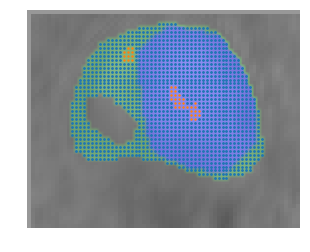

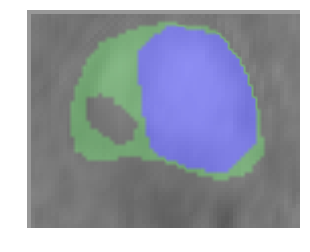

In [58]:
stuck,slices,index,features=7,27,1,0
check_resultofdropping(data,stuck,index,slices,features,y_train_direct,y_directlydropped)

In [14]:
#resampling algorithm
p_distr=0.975
n_subsamples=np.ceil(log((1-p_distr),1-(0.5)**6)).astype(int)
n_subsamples

235

In [66]:
# robust distance
class outliers_clean_resampling(BaseEstimator,TransformerMixin):
    def __init__(self,p_free,labels,y_dropped=pd.Series([]),md_dis=pd.Series([]),p_value_1=0.,p_value_2=0.,h_value=0):
        self.md_dis=md_dis
        self.p_value_1=p_value_1
        self.p_value_2=p_value_2
        self.p_free=p_free
        self.h_value=h_value
        self.labels=labels
        self.y_dropped=labels
    def fit(self,X,y=None):
        self.h_value=np.int((X.shape[0]+self.p_free+1)/2)
        mean_value=np.array([X.mean()])
        cov_value=np.mat(X.cov().as_matrix()).I
        print("MD Start")
        self.md_dis=distance.cdist(X,mean_value,metric='mahalanobis',VI=cov_value).ravel()
        print("MD end")
        chi2.fit(self.md_dis,self.p_free)
        self.p_value_1=np.sqrt(chi2.ppf(0.99999999,self.p_free))
        self.p_value_2=np.sqrt(chi2.ppf(0.5,self.p_free))
        return self
    def transform(self,X,y=None):
        np.random.seed(30)
        mean_set,cov_set,m_dis_order,V_j=[],[],[],[]
        print("Resampling begin")
        start1=time.time()
        for subset in range(n_subsamples):
            if subset%1000==0:
                print("replications number:%d time:%5.1f minute"%(subset,(time.time()-start1)/60))
            sample_ID=[]
            for index in range(self.p_free+1):
                sample_ID.append(np.random.choice(range(len(X)),replace=False))
            X_tr=np.array(X.iloc[sample_ID])
            sub_mean=np.array([(1/(self.p_free+1))*np.sum(X_tr,axis=0)])
            mean_set.append(sub_mean)
            sub_cov=np.mat((1/(self.p_free))*np.dot((X_tr-sub_mean).T,(X_tr-sub_mean))).I
            cov_set.append(sub_cov) 
            m_dis=pd.Series((distance.cdist(X,sub_mean,metric='mahalanobis',VI=sub_cov)**2).ravel())\
            .sort_values(ascending=True).iloc[self.h_value] #ascending=True : from small to big
            #if subset != 0 :
                #if m_dis>=(V_j[subset-1]/sub_cov.I.det())**(1/self.p_free):
                    #break
                #else:
                    #pass
            m_dis_order.append(m_dis)
            V_j.append(m_dis*np.linalg.det(sub_cov))
        print("Resampling end")
        #print(m_dis_order[])
        J_index=pd.Series(V_j).sort_values(ascending=True).index.tolist()[0]
        m_dis_value=m_dis_order[J_index]
        robust_mean=mean_set[J_index]
        robust_cov=((1+15/(X.shape[0]-self.p_free))**2)*(1/self.p_value_2)*m_dis_value*cov_set[J_index]
        print("RD Start")
        robust_dis=distance.cdist(X,robust_mean,metric='mahalanobis',VI=robust_cov).ravel()
        print("RD end")
        print("Robust distance: ",robust_dis)
        print("Cutoff value: ",self.p_value_1)
        count,count1,count2=0,0,0
        count1=X.shape[0]
        print("Drop Start")
        robust_dis=pd.DataFrame(robust_dis,columns=['robust_dis'])
        X=pd.concat([X,robust_dis],axis=1)
        self.labels=pd.concat([self.labels,robust_dis],axis=1)
        self.y_dropped=pd.concat([self.y_dropped,robust_dis],axis=1)
        X=X[X['robust_dis']<=self.p_value_1].copy()
        self.labels=self.labels[self.labels['robust_dis']<=self.p_value_1].copy()
        self.y_dropped=self.y_dropped[self.y_dropped['robust_dis']>self.p_value_1].copy()
        X=pd.DataFrame.reset_index(X).drop('index',axis=1)
        self.labels=pd.DataFrame.reset_index(self.labels).drop('index',axis=1)
        self.y_dropped=pd.DataFrame.reset_index(self.y_dropped).drop('index',axis=1)
        count2=X.shape[0]
        count=count1-count2
        print("Drop End")
        print("drop count:",count)
        return X,self.labels,self.y_dropped,robust_dis

In [60]:
n_subsamples=253
X_train_scaled=feature_eng.fit_transform(X_train.drop('Unnamed: 0',1))
X_train_new,y_train_resample,y_dropped_resample,robust_dis=outliers_clean_resampling(p_free=5,labels=y_train).fit_transform(X_train_scaled)

MD Start
MD end
Resampling begin
replications number:0 time:  0.0 minute
replications number:50 time:  0.3 minute
replications number:100 time:  0.7 minute
replications number:150 time:  1.1 minute
replications number:200 time:  1.4 minute
replications number:250 time:  1.8 minute
Resampling end
RD Start
RD end
Robust distance:  [ 4.95900966  4.42286574  4.33351325 ...,  3.4196288   2.49534299
  2.33820745]
Cutoff value:  6.76716980076
Drop Start
Drop End
drop count: 30197


In [61]:
y_dropped_resample

Unnamed: 0 indexofpixel  label  sourceofpixel  robust_dis
0              23   [ 5 12  0]    1.0              0    7.002749
1              40   [ 4 13  0]    1.0              0    6.840891
2              41   [ 5 13  0]    1.0              0    6.942340
3              59   [ 4 14  0]    1.0              0    8.338899
4              60   [ 5 14  0]    1.0              0    7.517397
5              78   [ 3 15  0]    1.0              0    9.042348
6              79   [ 4 15  0]    1.0              0    8.861882
7              80   [ 5 15  0]    1.0              0    8.166331
8              98   [ 3 16  0]    1.0              0    9.652873
9              99   [ 4 16  0]    1.0              0    9.552504
10            100   [ 5 16  0]    1.0              0    8.084019
11            101   [ 6 16  0]    1.0              0    6.942065
12            118   [ 3 17  0]    1.0              0    9.338246
13            119   [ 4 17  0]    1.0              0    8.675849
14            120   [ 5 17  0]    1.0              0    7.612929
15            121   [ 6 17  0]    1.0              0    6.871508
16            138   [ 2 18  0]    1.0              0    9.470125
17            139   [ 3 18  0]    1.0              0    9.919129
18            140   [ 4 18  0]    1.0              0    9.170333
19            141   [ 5 18  0]    1.0              0    7.698015
20            159   [ 2 19  0]    1.0              0   10.117487
21            160   [ 3 19  0]    1.0              0    9.445360
22            161   [ 4 19  0]    1.0              0    8.013625
23            162   [ 5 19  0]    1.0              0    7.169622
24            179   [ 2 20  0]    1.0              0    9.768169
25            180   [ 3 20  0]    1.0              0    9.500262
26            181   [ 4 20  0]    1.0              0    7.701574
27            198   [ 2 21  0]    1.0              0    9.309086
28            199   [ 3 21  0]    1.0              0    8.992791
29            200   [ 4 21  0]    1.0              0    7.517706
...           ...          ...    ...            ...         ...
30167      381251   [51 43 53]    2.0             10    7.905592
30168      381289   [50 44 53]    2.0             10    7.325257
30169      381290   [51 44 53]    2.0             10    7.288583
30170      381328   [50 45 53]    2.0             10    6.831064
30171      381966   [51 36 54]    1.0             10    6.831121
30172      381992   [48 37 54]    1.0             10    6.924200
30173      381993   [49 37 54]    1.0             10    6.919823
30174      381994   [50 37 54]    1.0             10    7.378127
30175      381995   [51 37 54]    1.0             10    6.829457
30176      382023   [48 38 54]    1.0             10    8.045691
30177      382024   [49 38 54]    1.0             10    8.107464
30178      382025   [50 38 54]    1.0             10    8.211091
30179      382026   [51 38 54]    1.0             10    7.736414
30180      382054   [47 39 54]    1.0             10    7.576219
30181      382055   [48 39 54]    1.0             10    9.540924
30182      382056   [49 39 54]    1.0             10    9.067346
30183      382057   [50 39 54]    1.0             10    9.006393
30184      382058   [51 39 54]    1.0             10    8.384176
30185      382087   [47 40 54]    2.0             10    7.413479
30186      382088   [48 40 54]    2.0             10    8.640147
30187      382089   [49 40 54]    2.0             10    7.896288
30188      382090   [50 40 54]    2.0             10    8.511243
30189      382091   [51 40 54]    1.0             10    7.920648
30190      382126   [48 41 54]    2.0             10    7.424484
30191      382127   [49 41 54]    2.0             10    7.236139
30192      382128   [50 41 54]    2.0             10    8.127667
30193      382129   [51 41 54]    2.0             10    6.946241
30194      382167   [50 42 54]    2.0             10    7.275605
30195      382168   [51 42 54]    2.0             10    6.922706
30196      382206   [50 43 54]    2.0     

In [64]:
import re
stuck =3
sli = 25
matrix = y_dropped_resample[y_dropped_resample['sourceofpixel']==stuck]
matrix=pd.DataFrame.reset_index(matrix).drop('index',axis=1)
for i in range(len(matrix)):
    temp = re.findall("\d+",matrix.iloc[i]['indexofpixel'])
    if (int(temp[2]) == sli):
        print (int(temp[0]))
        print (int(temp[1]))

45
39
46
40
47
40
44
41
45
41
46
41
47
41
46
42
65
70
66
70


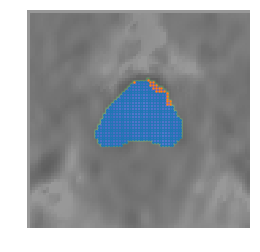

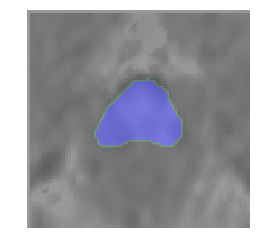

In [70]:
stuck,slices,index,features=1,25,1,0
check_resultofdropping(data,stuck,index,slices,features,y_train_resample,y_dropped_resample)

In [68]:
n_subsamples=3000
X_train_scaled=feature_eng.fit_transform(X_train.drop('Unnamed: 0',1))
X_train_new,y_train_new,y_dropped_new,robust_dis=outliers_clean_resampling(p_free=5,labels=y_train).fit_transform(X_train_scaled)

MD Start
MD end
Resampling begin
replications number:0 time:  0.0 minute
replications number:1000 time:  7.1 minute
replications number:2000 time: 14.2 minute
Resampling end
RD Start
RD end
Robust distance:  [ 5.38679218  4.90412566  4.99757828 ...,  4.21309422  3.73347245
  3.20798986]
Cutoff value:  6.76716980076
Drop Start
Drop End
drop count: 12680


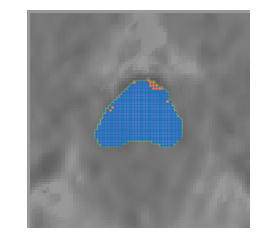

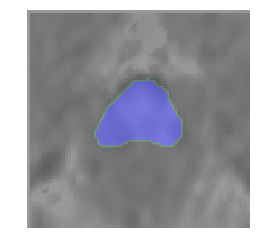

In [71]:
stuck,slices,index,features=1,25,1,0
check_resultofdropping(data,stuck,index,slices,features,y_train_new,y_dropped_new)

In [72]:
#save the result
#use the result of 3000 groups
X_train_new.to_csv("D:\\lab; signal processing\\forStudents\\medData\\train_resampling_X.csv",index=False)
y_train_new.to_csv("D:\\lab; signal processing\\forStudents\\medData\\train_resampling_y.csv",index=False)

In [3]:
X_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_resampling_X.csv")
y_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_resampling_y.csv")

In [4]:
X_train=X_train.drop(['robust_dis'],axis=1)
y_train=y_train.drop(['robust_dis'],axis=1)
y_train=y_train.rename(columns={'0':'label'})

In [56]:
#boundary detection
class boundary_detection(BaseEstimator,TransformerMixin):
    def __init__(self,labels,kmeans):
        self.labels=labels
        self.kmeans=kmeans
    def fit(self,X,y=None):
        start=time.time()
        print("fit start")
        self.kmeans.fit(X)
        print("fit end")
        print("fit time:%5.1fminute"%((time.time()-start)/60))
        return self
    def transform(self,X,y=None):
        #dataset=pd.concat([X,self.labels],axis=1)
        count1=X.shape[0]
        predict_cluster = self.kmeans.predict(X)
        predict_cluster=pd.DataFrame( predict_cluster,columns=['predict_cluster'])
        center_set = pd.DataFrame(columns=['feature0','feature1','feature2','feature3','feature4','predict_label'])
        X=pd.concat([X,predict_cluster],axis=1)
        self.labels=pd.concat([self.labels,predict_cluster],axis=1)
        i = 0
        #print (X)
        #print (self.kmeans.cluster_centers_)
        print("drop start")
        for cluster in range(np.int((X.shape[0])/20)):
            if cluster%500==0:
                print("cluster number:",cluster)
            temp_list = list(self.labels[self.labels['predict_cluster']==cluster]['label'])
            if 1 and 2 in temp_list:
                pass
            elif temp_list == []:
                pass
            else:
                #print (self.labels[self.labels['predict_cluster']==cluster])
                temp =temp_list[0]
                temp_center = np.append(self.kmeans.cluster_centers_[cluster],temp)
                temp_c = pd.DataFrame(np.array(temp_center))
                #center_set = pd.DataFrame(np.array(temp_centecolumns=('feature0','feature1','feature2','feature3','feature4','predict_label')r), columns=('feature0','feature1','feature2','feature3','feature4','predict_label')).append(center_set, ignore_index=True)
                center_set = pd.concat([center_set,temp_c])
                #print (center_set)
                #temp_index = X[(X['feature0']==self.kmeans.cluster_centers_[cluster][0])&(X['feature1']==self.kmeans.cluster_centers_[cluster][1])].index.tolist()
                #print (temp_index)
                #i=i+1
                #print (i)
                self.labels = self.labels[self.labels.predict_cluster !=cluster]
                X = X[X.predict_cluster != cluster]
        #dataset.append(pd.DataFrame(self.kmeans.cluster_centers_))#save all the centers of abandoned clusters
        print("drop end")
        count2=X.shape[0]
        print("Drop count:",count1-count2)        
        return X,self.labels,center_set

In [ ]:
#apply the function with 30 samples in one cluster
X_boundary,y_boundary,center=boundary_detection(labels=y_train.drop('Unnamed: 0',1),kmeans=MiniBatchKMeans(n_clusters=np.int((X_train.shape[0])/20),\
                                                                  n_init=1,max_iter=100,\
                                                                  init_size=3*np.int((X_train.shape[0])/20),verbose=-1,\
                                                                  random_state=42)).fit_transform(X_train)

fit start
Init 1/1 with method: k-means++
Inertia for init 1/1: 532.880921
Minibatch iteration 1/370100: mean batch inertia: 0.015165, ewa inertia: 0.015165 
Minibatch iteration 2/370100: mean batch inertia: 0.018310, ewa inertia: 0.015167 
Minibatch iteration 3/370100: mean batch inertia: 0.018118, ewa inertia: 0.015168 
Minibatch iteration 4/370100: mean batch inertia: 0.015965, ewa inertia: 0.015169 
Minibatch iteration 5/370100: mean batch inertia: 0.015407, ewa inertia: 0.015169 
Minibatch iteration 6/370100: mean batch inertia: 0.021368, ewa inertia: 0.015172 
Minibatch iteration 7/370100: mean batch inertia: 0.014543, ewa inertia: 0.015172 
Minibatch iteration 8/370100: mean batch inertia: 0.013957, ewa inertia: 0.015171 
Minibatch iteration 9/370100: mean batch inertia: 0.014371, ewa inertia: 0.015171 
[MiniBatchKMeans] Reassigning 50 cluster centers.
Minibatch iteration 10/370100: mean batch inertia: 0.021196, ewa inertia: 0.015174 
Minibatch iteration 11/370100: mean batch in

C:\Users\yangshanqi\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: '>' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


cluster number: 500
cluster number: 1000
cluster number: 1500
cluster number: 2000
cluster number: 2500
cluster number: 3000
cluster number: 3500
cluster number: 4000
cluster number: 4500
cluster number: 5000
cluster number: 5500
cluster number: 6000
cluster number: 6500
cluster number: 7000
cluster number: 7500
cluster number: 8000
cluster number: 8500
cluster number: 9000
cluster number: 9500
cluster number: 10000
cluster number: 10500
cluster number: 11000
cluster number: 11500
cluster number: 12000
cluster number: 12500
cluster number: 13000
cluster number: 13500
cluster number: 14000
cluster number: 14500
cluster number: 15000
cluster number: 15500
cluster number: 16000


In [53]:
len(y_boundary[y_boundary['label']==1])

194657

In [54]:
len(y_boundary[y_boundary['label']==2])

49768

In [55]:
center

Empty DataFrame
Columns: [feature0, feature1, feature2, feature3, feature4, predict_label]
Index: []

In [33]:
import re
dataset = loadmat ("D:\\lab; signal processing\\forStudents\\medData\\dataset.mat",mat_dtype=True)
data = dataset ["dataset"]
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list('my_cmap',['black','green','blue'],256)
def check_resultofdropping (data,stuck,index,slices,features,selected):
    target_data=data[stuck][0][0][0][0][:,:,slices,features]
    target_image1=target_data.reshape(target_data.shape[0],target_data.shape[1])
    target_label=data[stuck][0][0][0][index][:,:,slices]
    target_image2=target_label.reshape(target_label.shape[0],target_label.shape[1])
    plt.imshow(target_image1,cmap = matplotlib.cm.binary,alpha=0.4)
    plt.imshow(target_image2,cmap = cmap1,interpolation="bilinear",alpha=0.4)
    plt.axis("off") #close the axis number

    selected_x=[]
    selected_y=[]
    selected_matrix = selected[selected['sourceofpixel']==stuck]
    selected_matrix=pd.DataFrame.reset_index(selected_matrix).drop('index',axis=1)
    for i in range(len(selected_matrix)):
        temparr = re.findall("\d+",selected_matrix.iloc[i]['indexofpixel']) 
        if (int(temparr[2]) == slices):
            selected_x.append(int(temparr[0]))
            selected_y.append(int(temparr[1]))
    plt.scatter(selected_y,selected_x, s = 3)
    plt.show()
    
    target_data=data[stuck][0][0][0][0][:,:,slices,features]
    target_image1=target_data.reshape(target_data.shape[0],target_data.shape[1])
    target_label=data[stuck][0][0][0][index][:,:,slices]
    target_image2=target_label.reshape(target_label.shape[0],target_label.shape[1])
    plt.imshow(target_image1,cmap = matplotlib.cm.binary,alpha=0.4)
    plt.imshow(target_image2,cmap = cmap1,interpolation="bilinear",alpha=0.4)
    plt.axis("off") #close the axis number
    plt.show()

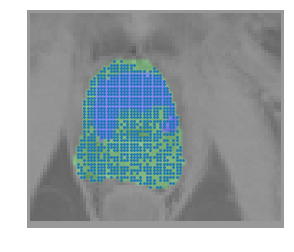

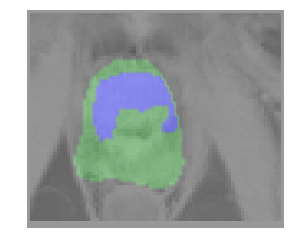

In [34]:
stuck,slices,index,features=4,24,1,4
check_resultofdropping(data,stuck,index,slices,features,y_boundary)

In [6]:
#save the result
X_boundary.to_csv("D:\\lab; signal processing\\forStudents\\medData\\train_x_boundarysel_10pergroup.csv",index=False)
y_boundary.to_csv("D:\\lab; signal processing\\forStudents\\medData\\train_y_boundarysel_10pergroup.csv",index=False)

NameError: name 'X_boundary' is not defined

In [8]:
X_boundary_10=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_x_boundarysel_10pergroup.csv")
y_boundary_10=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_y_boundarysel_10pergroup.csv")

In [13]:
len(y_boundary_10[y_boundary_10['label']==1])

140515

In [14]:
len(y_boundary_10[y_boundary_10['label']==2])

49768